#### kanamarlapudi satvika

#### 20BCD7034

#### SMART BRIDGE EXTERNSHIP - APPLIED DATA SCIENCE

#### ASSIGNMENT 2

1. Download the Dataset
2. Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load and Prepare the Data
data = pd.read_csv('/content/titanic.csv')



3. Perform Below Visualizations.

● Univariate Analysis

● Bi - Variate Analysis

● Multi - Variate Analysis

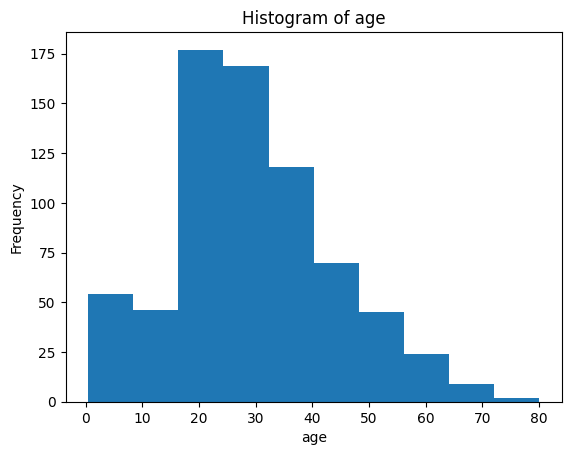

In [ ]:
plt.hist(data['age'], bins=10)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

Bivariate analysis

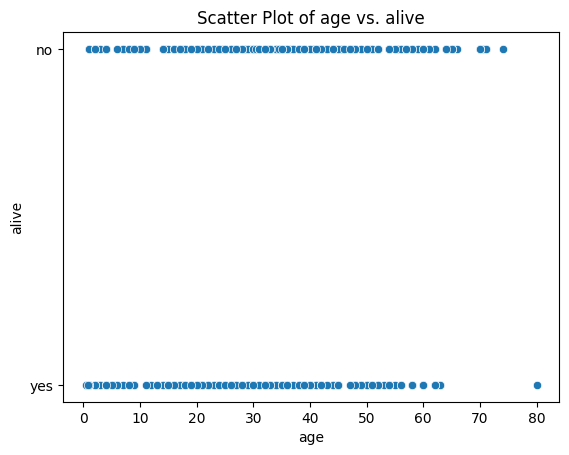

In [ ]:
sns.scatterplot(x='age', y='alive', data=data)
plt.title('Scatter Plot of age vs. alive')
plt.show()


Multivariate analysis

<ipython-input-15-71d1de0317a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


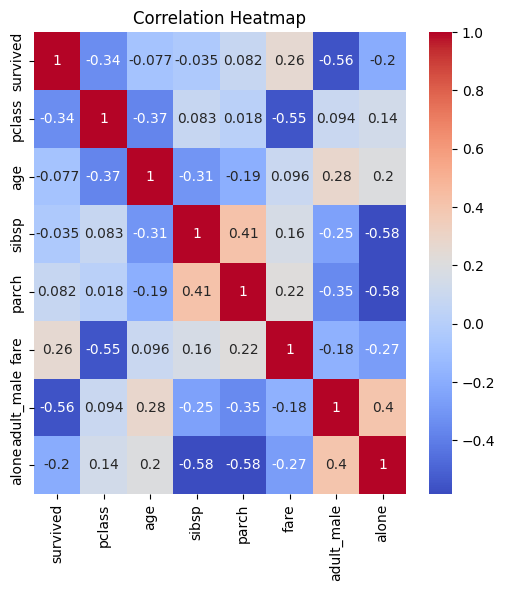

In [ ]:
plt.figure(figsize=(6, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

4. Statistical analysis

In [ ]:
statistics = data.describe()

print(statistics)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


5. Handle the Missing values.

In [ ]:
missing_values = data.isnull()

missing_counts = missing_values.sum()

print(missing_counts)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Age
data['age'].fillna(data['age'].mean(), inplace=True)
# Deck
data['deck'].fillna(data['deck'].mode(), inplace=True)

6. Find the outliers and replace the outliers.


In [ ]:
data['sex']=data.sex.replace(['male','female'], [1,2] )

In [ ]:
# Step 3: Outlier Detection and Replacement
def replace_outliers_with_mean(df, variable):
    if df[variable].dtype == np.int64:
        # Calculate z-scores for the variable
        z_scores = (df[variable] - df[variable].mean()) / df[variable].std()

        # Define a threshold for z-score beyond which values are considered outliers
        threshold = 3

        # Find the indices of outliers
        outlier_indices = np.abs(z_scores) > threshold

        # Replace outliers with the mean value of the variable
        df.loc[outlier_indices, variable] = df[variable].mean()

# Iterate over each variable in the dataset
columns = ["age", "sex", "pclass", "fare"]
for column in columns:
    replace_outliers_with_mean(data, column)

# Step 4: Descriptive Statistics
desc_stats = data.describe()
print('Descriptive Statistics:')
print(desc_stats)



Descriptive Statistics:
         survived      pclass         sex         age       sibsp       parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    1.352413   29.699118    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.002015    1.102743    0.806057   
min      0.000000    1.000000    1.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    1.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   29.699118    0.000000    0.000000   
75%      1.000000    3.000000    2.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    2.000000   80.000000    8.000000    6.000000   

             fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


7. Check for Categorical columns and perform encoding.

In [ ]:
# Step 8: Identify Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Step 9: Perform Encoding
for column in categorical_columns:
    if len(data[column].unique()) > 2:
        # Apply one-hot encoding for columns with more than 2 unique categories
        one_hot_encoded = pd.get_dummies(data[column], prefix=column)
        data_filled = pd.concat([data, one_hot_encoded], axis=1)
    else:
        # Apply label encoding for binary categorical columns
        label_encoder = LabelEncoder()
        data[column] = label_encoder.fit_transform(data[column])


8. Split into dependent and independent variables

In [ ]:
# One-Hot Encoding for Categorical Variables

encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Step 5: Split into Dependent and Independent Variables
X = encoded_data.drop('alone', axis=1)  # Independent variables (features)
y = encoded_data['alone']  # Dependent variable



9. Scale the independent variables.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

10. Split into train and test data

In [ ]:
# Step 12: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
